## Modèle

On va prédire les prix pour Amazon.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from notify_run import Notify # pour m'envoyer des notification

In [2]:
notify = Notify()
notify.register()

Endpoint: https://notify.run/sspFK3srOSMNssoy
To subscribe, open: https://notify.run/c/sspFK3srOSMNssoy
Or scan this QR code:

                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              
                                                              

### Importation des données

In [3]:
amzn = pd.read_csv('amazon2.csv')
goog = pd.read_csv('google2.csv')
msft = pd.read_csv('microsoft2.csv')

In [4]:
amzn.index = amzn.Date
goog.index = goog.Date
msft.index = msft.Date

In [5]:
amzn = amzn.drop("Unnamed: 0", axis = 1)
goog = goog.drop("Unnamed: 0", axis = 1)
msft = msft.drop("Unnamed: 0", axis = 1)

In [6]:
amzn

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Mean_Price
Date,,,,,,,,,
2010-09-30,2010-09-30,160.01,160.93,155.60,157.06,7606000,0,0,158.265
2010-10-01,2010-10-01,157.08,157.44,152.20,153.71,8683400,0,0,154.820
2010-10-04,2010-10-04,153.95,155.96,152.79,155.39,5346500,0,0,154.375
2010-10-05,2010-10-05,157.08,161.21,157.01,160.87,5620000,0,0,159.110
2010-10-06,2010-10-06,160.60,160.68,154.60,155.40,6060800,0,0,157.640
...,...,...,...,...,...,...,...,...,...
2020-09-22,2020-09-22,3033.84,3133.99,3000.20,3128.99,6948800,0,0,3067.095
2020-09-23,2020-09-23,3120.43,3127.00,2992.38,2999.86,5652700,0,0,3059.690
2020-09-24,2020-09-24,2977.79,3069.30,2965.00,3019.79,5529400,0,0,3017.150


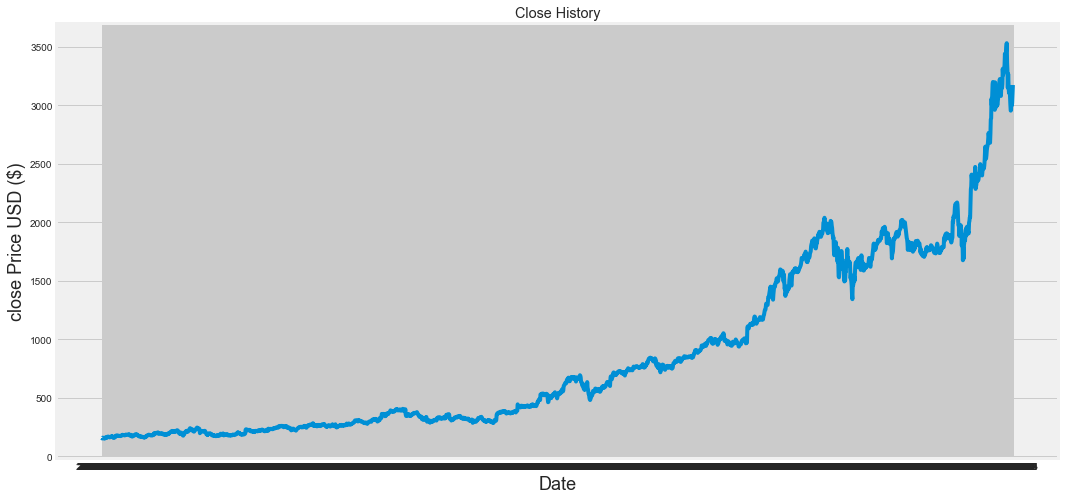

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close History')
plt.plot(amzn['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('close Price USD ($)', fontsize=18)
plt.show()

In [8]:
#Create a new dataframe with only the 'Close column
data = msft.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values.reshape(-1, 1)
#Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .8 ))

training_data_len

2013

In [9]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [11]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    #if i<= 61:
        #print(x_train)
        #print(y_train)
        #print()

In [12]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [13]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [14]:
x_train.shape

(1953, 60, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model.fit(x_train, y_train, batch_size=25, epochs=50)

C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ouizb\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

Epoch 1/50
79/79 [==============================] - 7s 84ms/step - loss: 0.0017: 0s - 
Epoch 2/50
79/79 [==============================] - 7s 82ms/step - loss: 4.2638e-05
Epoch 3/50
79/79 [==============================] - 6s 82ms/step - loss: 4.1170e-05
Epoch 4/50
79/79 [==============================] - 6s 76ms/step - loss: 4.4747e-05
Epoch 5/50
79/79 [==============================] - 6s 72ms/step - loss: 4.7269e-05
Epoch 6/50
79/79 [==============================] - 6s 74ms/step - loss: 4.4586e-05
Epoch 7/50
79/79 [==============================] - 7s 92ms/step - loss: 4.5419e-05
Epoch 8/50
79/79 [==============================] - 6s 81ms/step - loss: 3.9322e-05
Epoch 9/50
79/79 [==============================] - 7s 88ms/step - loss: 4.4764e-05
Epoch 10/50
79/79 [==============================] - 7s 94ms/step - loss: 4.4513e-05
Epoch 11/50
79/79 [==============================] - 7s 83ms/step - loss: 4.5397e-05
Epoch 12/50
79/79 [==============================] - 7s 85ms/step - los

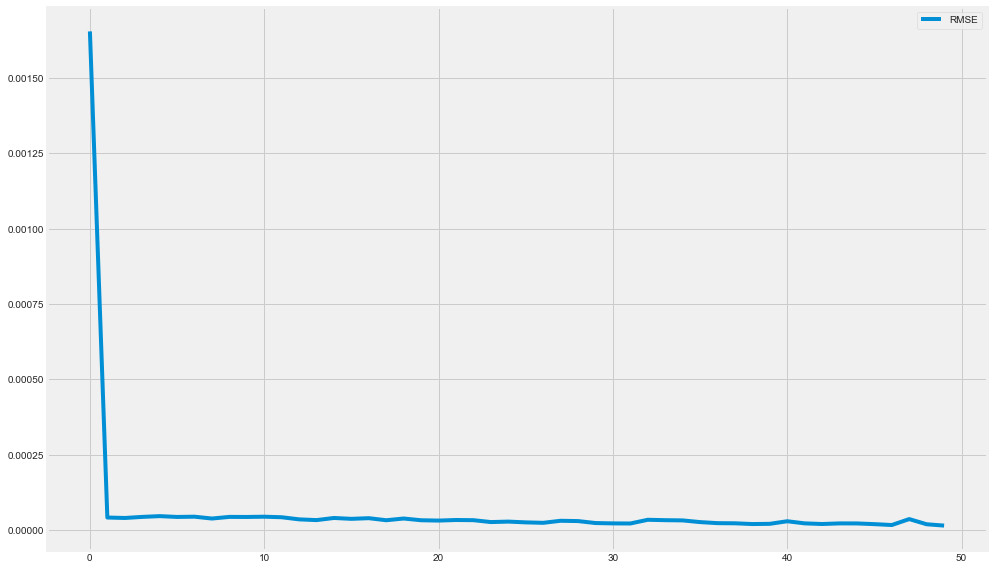

In [16]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='RMSE')
plt.legend(loc='best')
plt.show()

In [17]:
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.3748929021388956

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\ouizb\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


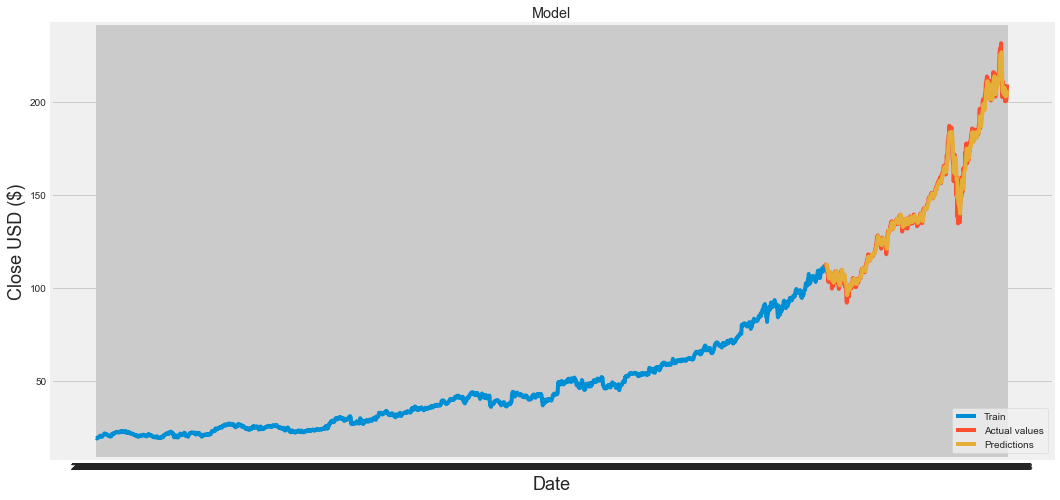

In [19]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Actual values', 'Predictions'], loc='lower right')
plt.show()

In [20]:
# Notification de la fin du premier algo 
notify.send('Algo fini!')

In [21]:
from keras.models import load_model

modelFileName = 'model_lstm1.h5'

model.save(modelFileName) # saves the trained model
print("Model saved.")

#del model  # deletes the existing model variable

Model saved.


## Nouvelle prédiction

In [22]:
import yfinance as yf
tickerSymbol = "MSFT"

In [23]:
tickerData = yf.Ticker(tickerSymbol)
df = tickerData.history(period='1d', start='2010-10-1', end="2020-9-30")
new_df = df.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(f'Prix prédit: {pred_price}')

Prix prédit: [[208.41156]]


In [24]:
actual_price = tickerData.history(period='1d', start="2020-9-29", end="2020-9-30")
actual_price = actual_price.Close.values
actual_price = np.array(actual_price)
print(f'Prix réel: {actual_price}')

Prix réel: [209.44 207.26]


In [25]:
notify.send('Prédiction fini!')